In [33]:
%load_ext autoreload
%autoreload 2
import numpy as np
from juno_custom.lattice_generation import lattice_utils
from scipy.fftpack import fft2, fftshift, ifft2, ifftshift
from juno.Simulation import generate_sq_freq_arr
import pickle

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
wavelength = 488.e-9
n = 1.33
media_wavelength = wavelength/n
wavelength = media_wavelength
wavenumber = 2*np.pi/wavelength
pixel_size = wavelength/4

In [53]:
with open(r"C:\Users\User\Github\LLS_Simulation\DesiredPupilEField.pkl", "rb") as f:
    pefield = pickle.load(f)

In [35]:
eslm_ = fftshift(ifft2(ifftshift(pefield)))

In [31]:
with open(r"C:\Users\User\Github\LLS_Simulation\ESLM.pkl", "rb") as f:
    eslm = pickle.load(f)

In [51]:
print(pefield.max())
where = np.where(pefield == pefield.max())
# 
pefield[pefield == pefield.max()] = 0
# import matplotlib.pyplot as plt
# print(where)
# plt.imshow(where, aspect="auto")
# plt.colorbar()

1.0


In [69]:
print(eslm_.real.min())

-2.7548048450330446e-05


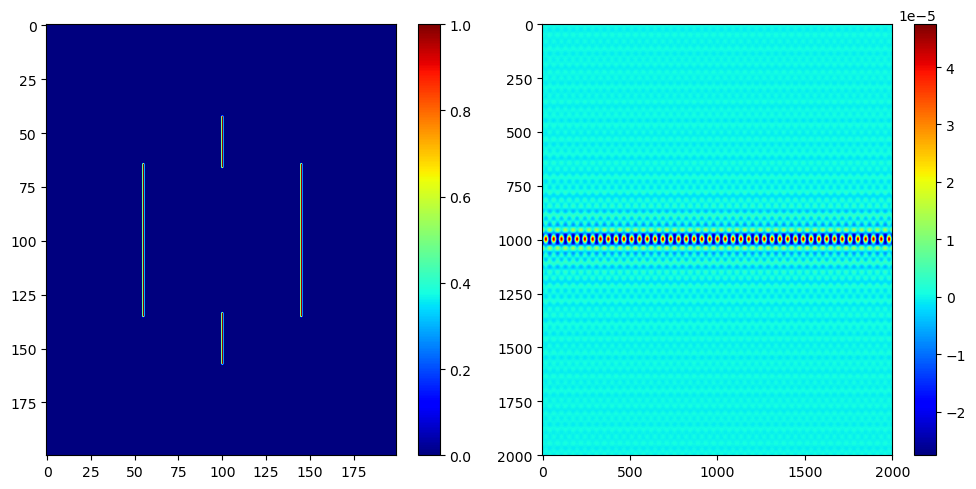

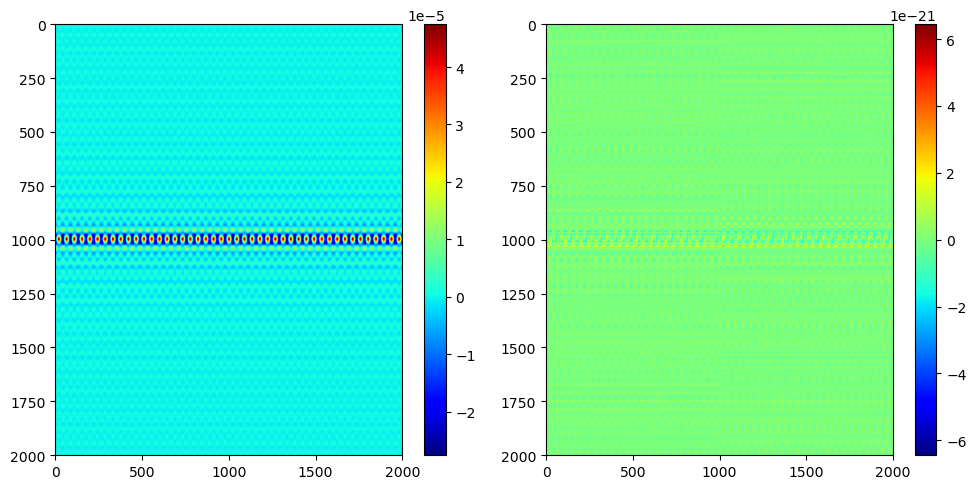

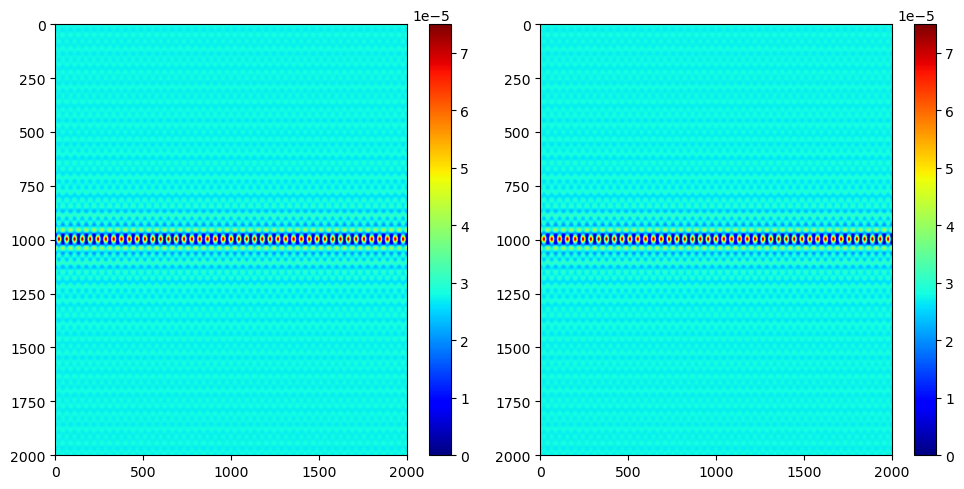

In [71]:
lattice_utils.plot_grid(pefield[900:1100, 900:1100], eslm, cmap="jet", aspect="auto")
lattice_utils.plot_grid(eslm_.real, eslm_.imag, cmap="jet", aspect="auto")
lattice_utils.plot_grid(np.abs(eslm_-eslm_.min()), np.abs(eslm_.real-eslm_.real.min()), cmap="jet", aspect="auto")


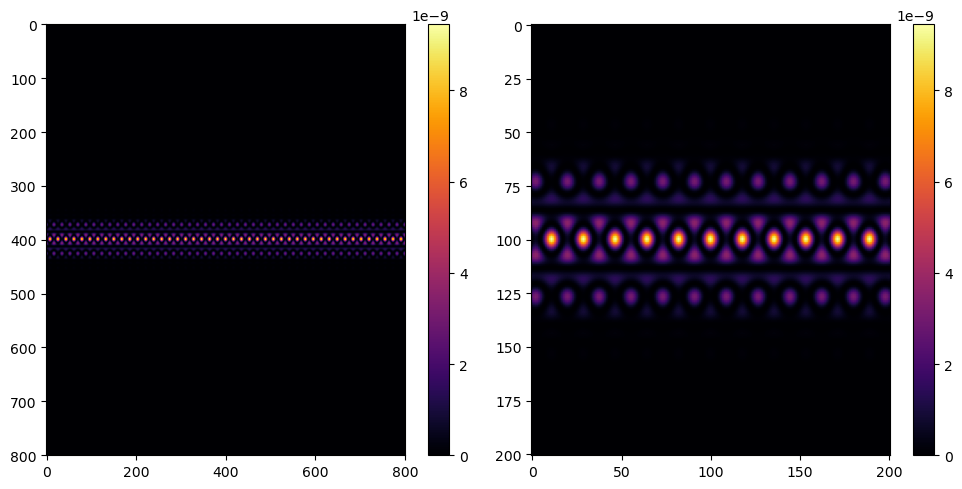

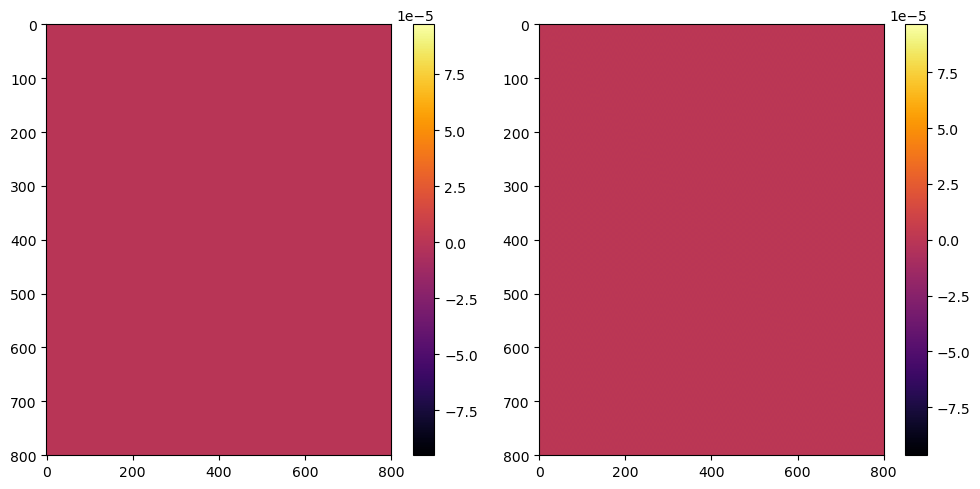

In [6]:
wavefront = np.load(r"C:\Users\User\Github\juno_custom\juno_custom\lattice_generation\arrays\wavefront_from_pupil.npy")
wavefront_intensity = np.abs(wavefront)**2
lattice_utils.plot_grid(wavefront_intensity, wavefront_intensity[300:501, 300:501], cmap="inferno", aspect="auto")
lattice_utils.plot_grid(wavefront.real, wavefront.imag, cmap="inferno", aspect="auto")

In [5]:
cmap = "inferno"

fft_wavefront = fftshift(fft2(wavefront))

realspace_x = wavefront.shape[0] * pixel_size / wavelength
realspace_y = wavefront.shape[1] * pixel_size / wavelength
freq_arr = generate_sq_freq_arr(wavefront, pixel_size)

import os
for i in range(0, 100):
    distance = 0.25*i*wavelength
    output = lattice_utils.calculate(fft_wavefront, distance, freq_arr, wavenumber)

    os.makedirs(r"C:\Users\User\Github\juno_custom\juno_custom\lattice_generation\arrays\output_from_pupil", exist_ok=True)
    np.save(r"C:\Users\User\Github\juno_custom\juno_custom\lattice_generation\arrays\output_from_pupil\{}.npy".format(i), output)

# distance = 0*wavelength
# lattice_utils.calculate_and_plot(fft_wavefront, distance, freq_arr, wavenumber, wavelength, n, cmap, realspace_x, realspace_y, dpi=200)
# distance = 21*wavelength
# lattice_utils.calculate_and_plot(fft_wavefront, distance, freq_arr, wavenumber, wavelength, n, cmap, realspace_x, realspace_y, dpi=200)
# distance = 45*wavelength
# lattice_utils.calculate_and_plot(fft_wavefront, distance, freq_arr, wavenumber, wavelength, n, cmap, realspace_x, realspace_y, dpi=200)